<a href="https://colab.research.google.com/github/PraeJi/Python-Practice/blob/master/3_02_tf_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
n = 4

# define training example
X = tf.constant([[0.0, 0.0],
                 [0.0, 0.1],
                 [1.0, 0.0],
                 [1.0, 1.0]])
y = tf.constant([[0.0],
                 [1.0],
                 [1.0],
                 [0.0]])

# define layer 1
W1 = tf.Variable(tf.random.normal((2, 2))) # weight for layer 1
b1 = tf.Variable(tf.random.normal((1, 2))) # bias for layer 1

# define layer 2
W2 = tf.Variable(tf.random.normal((2, 1)))
b2 = tf.Variable(tf.random.normal((1, 1)))

eta = 1

for i in range(600):
  # define output and loss
  with tf.GradientTape() as tape:
    a1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    a2 = tf.nn.sigmoid(tf.matmul(a1, W2) + b2)
    L = tf.reduce_sum(-(y*tf.math.log(a2) + (1-y)*tf.math.log(1-a2)))/n # L represent loss function

  # calculate gradiente
  [gw1, gb1, gw2, gb2] = tape.gradient(L, [W1, b1, W2, b2])

  # update w qnd b
  W2.assign_add(-eta*gw2)
  b2.assign_add(-eta*gb2)
  W1.assign_add(-eta*gw1)
  b1.assign_add(-eta*gb1)

# calculate y_hat
a1 = tf.math.sigmoid(tf.matmul(X, W1) + b1)
a2 = tf.math.sigmoid(tf.matmul(a1, W2) + b2)
y_hat = tf.round(a2)
print("Predicted output = ")
tf.print(y_hat)

Predicted output = 
[[0]
 [1]
 [1]
 [0]]


# Keras API

In [ ]:
n = 4

# define training example
X = tf.constant([[0.0, 0.0],
                 [0.0, 0.1],
                 [1.0, 0.0],
                 [1.0, 1.0]])
y = tf.constant([[0.0],
                 [1.0],
                 [1.0],
                 [0.0]])

# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)), # the input layer has 2 components
    tf.keras.layers.Dense(8, activation='sigmoid'), # first hidden layer has 2 units (or neural network) inside
    tf.keras.layers.Dense(1, activation='sigmoid') # the output layer has 1 units
])

# Note: - Dense mean this is the basic "fully connected layer"
#       - fully connected layer mean all the input are completly connected to all of unit in this layer

# define the training algorithm and loss function
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(X, y, epochs=200, batch_size=1, shuffle=True)

# predict
a = model.predict(X)
y_hat = tf.round(a)
print(y_hat)

# evaluate the model
model.evaluate(X, y)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6333 - loss: 1.0759  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 1.1612 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.4436 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.3160 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3667 - loss: 0.9312     
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 0.8901 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8333 - loss: 0.6452 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.2325 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6333 - loss: 0.7957
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 0.8161 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3667 - loss: 0.8249    
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

[0.36329972743988037, 0.75]

In [ ]:
D = np.column_stack((X, y))
np.save('xor.npy', D)

In [ ]:
D = np.load('xor.npy')
X = D[:, :2]
y = D[:, 2]

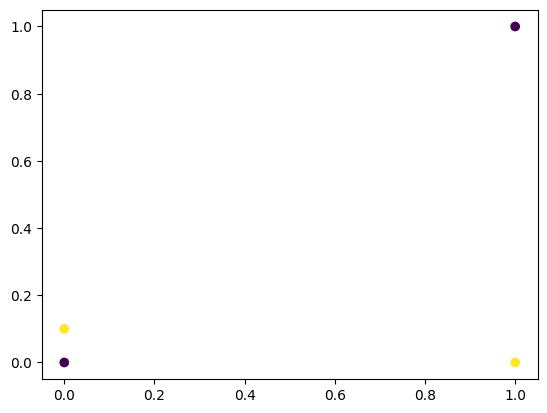

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Note:
* 0 or 1 output use "sigmoid"
* -1 or 1 output use "tanh"
* real or continuous output use "linear"

In [ ]:
# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)), # the input layer has 2 components
    tf.keras.layers.Dense(8, activation='relu'), # first hidden layer has 2 units (or neural network) inside
    tf.keras.layers.Dense(1, activation='sigmoid') # the output layer has 1 units
])

# define the training algorithm and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(X, y, epochs=500, batch_size=8)

# predict
a = model.predict(X)
y_hat = tf.round(a)
print(y_hat)

# evaluate the model
model.evaluate(X, y)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_hat)
plt.show()